In [1]:
!pip install scikit-learn

In [2]:
from sklearn import svm

In [3]:
xor_data = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]

지도 학습과 비지도 학습의 구별이 중요.

레이블, 또는 타겟. 
[0,0,0]
이라고 하면, 앞에 두개가 입력 데이터이고, 마지막 1개는 정답데이터이다. 

아래와 같이 분리해보자. 

In [5]:
data = []
label =[]
for row in xor_data:
    p =row[0]
    q =row[1]
    r =row[2]
    data.append([p,q])
    label.append(r)

In [10]:
clf = svm.SVC()
clf.fit(data, label) # 맞춰야 하는 것은 데디터, 

SVC()

In [13]:
pre = clf.predict(data)

In [16]:
ok = 0; total = 0
for idx, answer in enumerate(label):
    p = pre[idx]
    if p == answer:
        ok += 1
    total += 1
print('accu :', ok, '/', total, '=', ok/total)

accu : 4 / 4 = 1.0


In [17]:
# XOR의 계산 결과 데이터 --- (※1)
xor_data = [
    #P, Q, result
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]
# 학습을 위해 데이터와 레이블 분리하기 --- (※2)
# 학습시키기 fit() 매개변수에 필요
data = []
label = []
for row in xor_data:
    p = row[0]
    q = row[1]
    r = row[2]
    data.append([p, q])
    label.append(r)
# 데이터 학습시키기 fit()--- (※3)
# SVC 알고리즘 사용
clf = svm.SVC()
clf.fit(data, label)
# 데이터 예측하기 predict() --- (※4)
pre = clf.predict(data)
print(" 예측결과:", pre)
# 결과 확인하기 --- (※5)
ok = 0; total = 0
for idx, answer in enumerate(label):
    p = pre[idx]
    if p == answer: ok += 1
    total += 1
print("정답률:", ok, "/", total, "=", ok/total)

 예측결과: [0 1 1 0]
정답률: 4 / 4 = 1.0


In [18]:
import pandas as pd
from sklearn import svm, metrics

In [22]:
xor_df = pd.DataFrame(xor_data)
data = xor_df.loc[:,0:1]
label = xor_df.loc[:,2]   # 레이블

In [24]:
# 데이터 학습과 예측하기 --- (※2)
clf = svm.SVC()
clf.fit(data, label)
pre = clf.predict(data)

In [25]:
# 정답률 구하기 --- (※3)
ac_score = metrics.accuracy_score(label, pre)
print("정답률 =", ac_score)

정답률 = 1.0


In [27]:

label

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

In [28]:
pre

array([0, 1, 1, 0], dtype=int64)

### 외국어 문장 판별하기
- 외국어 글자를 읽어 들이고 어떤 언어인지 판정하는 프로그램 만들기
- 알파벳을 사용하는 언어라도 프랑스어, 타갈로어(필리핀), 인도네시아어 등
### 판정 방법
- 글자를 곧바로 학습기에 넣을 수 없음
- 글자를 나타내는 백터로 변경
- 언어가 다르면 알파벳 출현 빈도가 다름(언어학)
- a 부터 z 까지의 출현 빈도를 확인해서 이를 특징으로 사용
### 샘플 데이터 수집
- 각 언여별로 풍부한 데이터가 있는 위키피디아 글자 사용
- 영어(en), 프랑스어(fr), 인도네시아(id), 타갈로어(tl) 테스트
- 학습데이터 20개 / 테스트 8개
### 웹 서비스
- 학습 모델과 flask를 이용해서 판정 사이트 개발

In [61]:
from sklearn import svm, metrics
import glob, os.path, re, json

def check_freq(fname):
    name = os.path.basename(fname)
    lang = re.match(r'[a-z]{2,}',name).group()
    print(lang)

def load_file(path):
    freqs = []
    labels= []
    file_list  = glob.glob(path)
    for fname in file_list:
        print(fname)

path = './data/test/*.txt'
file_list = glob.glob(path)
for fname in file_list:
    print(fname)

print(fname)

In [70]:
# 텍스트를 읽어 들이고 출현 빈도 조사하기 --- (※1)
def check_freq(fname):
    name = os.path.basename(fname)
    # 파일이름 앞의 두 문자가 언어 코드
    lang = re.match(r'^[a-z]{2,}', name).group()
#     print(name)
#     print(lang)
    with open(fname, "r", encoding="utf-8") as f:
        text = f.read()
    text = text.lower() # 소문자 변환
    # 숫자 세기 변수(cnt) 초기화하기
    cnt = [n for n in range(0, 26)]
    #ord() 함수 : 특정한 한 문자를 아스키 코드 값으로 변환해 주는 함수
    code_a = ord("a") # 97
    code_z = ord("z")
    #print(code_a)
    # 알파벳 출현 횟수 구하기 --- (※2)
    for ch in text:
        n = ord(ch)
        #print(n)
        if code_a <= n <= code_z: # a~z 사이에 있을 때, 알파벳만 처리
            cnt[n - code_a] += 1
    # 정규화하기 --- (※3) 하는 이유?? 각 텍스트파일에 글자수가 다르므로
    total = sum(cnt)
    freq = list(map(lambda n: n / total, cnt))
    return (freq, lang)

In [72]:
# 각 파일 처리하기
def load_files(path):
    freqs = []
    labels = []
    # glob - 특정 파일만 출력하기
    # https://wikidocs.net/3746
    file_list = glob.glob(path)
    for fname in file_list:
        r = check_freq(fname)
        freqs.append(r[0])
        labels.append(r[1])
    return {"freqs":freqs, "labels":labels}
data = load_files("./data/test/*.txt")
test = load_files("./data/train/*.txt")

In [73]:
# 이후를 대비해서 JSON으로 결과 저장하기 - 이미지 출력용
with open("./data/freq.json", "w", encoding="utf-8") as fp:
    json.dump([data, test], fp)

In [74]:
# 학습하기 --- (※4)
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])

SVC()

In [75]:
# 예측하기 --- (※5)
predict = clf.predict(test["freqs"])

In [76]:
# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("정답률 =", ac_score)
print("리포트 =")
print(cl_report)

정답률 = 1.0
리포트 =
              precision    recall  f1-score   support

          en       1.00      1.00      1.00         5
          fr       1.00      1.00      1.00         5
          id       1.00      1.00      1.00         5
          tl       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### 데이터마다의 분포를 그래프로 확인
- 알파벳의 빈도가 어떻게 다른지 시각적으로 확인


In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [79]:
# 알파벳 출현 빈도 데이터 읽어 들이기 --- (※1)
with open("./data/freq.json", "r", encoding="utf-8") as fp:
    freq = json.load(fp)

In [80]:
# 언어마다 계산하기 --- (※2)
lang_dic = {}
for i, lbl in enumerate(freq[0]["labels"]):
    fq = freq[0]["freqs"][i]
    if not (lbl in lang_dic):
        lang_dic[lbl] = fq
        continue
    for idx, v in enumerate(fq):
        lang_dic[lbl][idx] = (lang_dic[lbl][idx] + v) / 2

In [111]:
for idx, v in enumerate(freq[0]['freqs'][7]):
    print(idx, v)

0 0.14011127971674253
1 0.014668689934243804
2 0.01669195751138088
3 0.02225594334850784
4 0.048558421851289835
5 0.010116337885685382
6 0.05867475973697522
7 0.013151239251390997
8 0.06272129489124936
9 0.005058168942842691
10 0.02225594334850784
11 0.03945371775417299
12 0.035912999494183105
13 0.09509357612544259
14 0.0637329286798179
15 0.051593323216995446
16 0.009104704097116844
17 0.04552352048558422
18 0.05311077389984825
19 0.06120384420839656
20 0.041476985331310064
21 0.012139605462822459
22 0.024785027819929185
23 0.012139605462822459
24 0.027314112291350532
25 0.013151239251390997


In [101]:
len(freq[0]['freqs'])

8

In [81]:
# Pandas의 DataFrame에 데이터 넣기 --- (※3)
asclist = [[chr(n) for n in range(97,97+26)]]
df = pd.DataFrame(lang_dic, index=asclist)

In [112]:
asclist

[['a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z']]

In [82]:
df.head()

,en,fr,id,tl
a,0.073685,0.063721,0.130882,0.161697
b,0.014759,0.011627,0.023609,0.017067
c,0.034693,0.036861,0.014649,0.015481
d,0.043393,0.044747,0.041807,0.024381
e,0.122436,0.132109,0.086407,0.040695


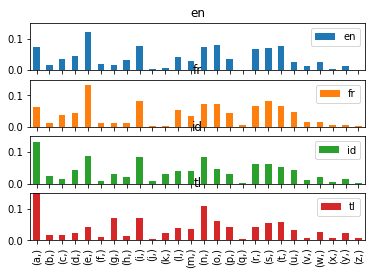

In [83]:
# 그래프 그리기 --- (※4)
df.plot(kind="bar", subplots=True, ylim=(0,0.15))
plt.savefig("lang-plot.png")

<AxesSubplot:>

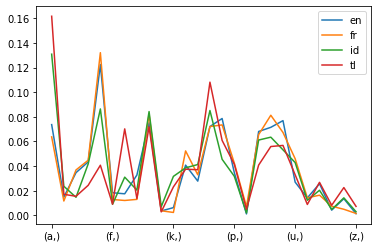

In [86]:
# 다른 그래프로 확인
df.plot(kind='line')

예측모델 파일로 만들기
joblib 설치
pip install joblib
dump() : 모델 파일생성
load() : 파이 읽기


In [90]:
import joblib

with open('./data/freq.json', 'r', encoding='utf-8') as f:
    d = json.load(f)
    data = d[0]

clf=svm.SVC()
clf.fit(data['freqs'], data['labels'])

joblib.dump(clf, './data/freq.pkl')

['./data/freq.pkl']

### Web 인터페이스 추가
- 언어판정 모델을 활용해서 언어 판정 웹 서비스 개발
- 훈련 모델과 Flask 사용
### 폴더구성
- data/freq.pkl
- data/lang_result.html
- data/app.py

# app01.py
from flask import Flask, request, render_template
from sklearn import svm
import joblib

app = Flask(__name__)

# 판정하기
def detect_lang(text):
    # 학습 데이터 읽어 들이기
    pklfile = 'data/freq.pkl'
    clf = joblib.load(pklfile)

    # 알파벳 출현 빈도 구하기
    text = text.lower()
    code_a, code_z = (ord("a"), ord("z"))
    cnt = [0 for i in range(26)]
    for ch in text:
        n = ord(ch) - code_a
        if 0 <= n < 26: cnt[n] += 1
    total = sum(cnt)
    if total == 0: return "입력이 없습니다"
    freq = list(map(lambda n: n/total, cnt))
    # 언어 예측하기
    res = clf.predict([freq])
    # 언어 코드를 한국어로 변환하기
    lang_dic = {"en":"영어","fr":"프랑스어",
        "id":"인도네시아어", "tl":"타갈로그어"}
    return lang_dic[res[0]]

@app.route('/')
def index():
    return render_template('lang_result.html')
@app.route('/result',methods=['post'])
def result():
    data = request.form['data']
    lang = detect_lang(data)
    return render_template('lang_result.html',result=lang)


if __name__ == '__main__':
    app.run(debug=True)


### <!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <title>lang_result.html</title>
</head>
<body>
<h1>
    입력 Input<hr>
    <form action="/result" method="post">
        <textarea name="data" rows="8" cols="40"></textarea>
        <p><input type="submit" value="판정"></p>
    </form>
    결과 Result<hr>
    {{ result }}
</h1>
</body>
</html>
